In [137]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
import itertools
from sklearn.metrics import mean_squared_error
import gc
import seaborn as sns
import math

In [55]:
#reading dataframe
df = pd.read_csv('/home/abhishek/projects/carsalesprediction/newcarsalesnorway/norway_new_car_sales_by_make.csv')

In [56]:
#assinging value to cols , which we might not need them 
cols = ['Year' ,'Month', 'Pct']

In [57]:
#merging month and year as string 
df['date'] = df.Year.astype(str).str.cat(df.Month.astype(str), sep='-')

In [58]:
#dropping the assigned columns
df = df.drop(cols, axis=1)

In [59]:
#dROPPING NULL ENTRIES 
df.dropna(inplace=True)

In [60]:
#checking data types 
df.dtypes

Make        object
Quantity     int64
date        object
dtype: object

In [61]:
#converting into date format which is important to form prediction
df['date'] = pd.to_datetime(df['date'])

In [62]:
df

,Make,Quantity,date
0,Toyota,2884,2007-01-01
1,Volkswagen,2521,2007-01-01
2,Peugeot,1029,2007-01-01
3,Ford,870,2007-01-01
4,Volvo,693,2007-01-01
5,Skoda,665,2007-01-01
6,Opel,622,2007-01-01
7,Audi,599,2007-01-01
8,Honda,423,2007-01-01
9,Mercedes-Benz,362,2007-01-01


In [63]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
df['Make'] = labelencoder.fit_transform(df['Make'])

In [64]:
df

,Make,Quantity,date
0,61,2884,2007-01-01
1,62,2521,2007-01-01
2,45,1029,2007-01-01
3,18,870,2007-01-01
4,63,693,2007-01-01
5,52,665,2007-01-01
6,44,622,2007-01-01
7,2,599,2007-01-01
8,19,423,2007-01-01
9,38,362,2007-01-01


In [65]:
df = df.drop('Make',axis =1)

In [66]:
df_train = df.loc[df['date'] < '2016-01-01T00:00:00.000000000']
df_test = df.loc[df['date'] >= '2016-01-01T00:00:00.000000000']

In [67]:
df_train.head(3)

,Quantity,date
0,2884,2007-01-01
1,2521,2007-01-01
2,1029,2007-01-01


In [68]:
df_test.head(3)

,Quantity,date
3919,1743,2016-01-01
3920,1106,2016-01-01
3921,1089,2016-01-01


In [69]:
df_train = df_train.groupby(['date'])['Quantity'].sum()
df_test = df_test.groupby(['date'])['Quantity'].sum()

In [70]:
df_train

date
2007-01-01    12684
2007-02-01     9793
2007-03-01    11263
2007-04-01     8854
2007-05-01    12007
2007-06-01    11083
2007-07-01    12061
2007-08-01    10786
2007-09-01     9340
2007-10-01    11646
2007-11-01    10452
2007-12-01     9222
2008-01-01     9901
2008-02-01    10567
2008-03-01     9506
2008-04-01    11704
2008-05-01    10217
2008-06-01     9670
2008-07-01     9605
2008-08-01     7833
2008-09-01     8453
2008-10-01     8390
2008-11-01     6952
2008-12-01     7819
2009-01-01     5353
2009-02-01     6287
2009-03-01     7601
2009-04-01     7504
2009-05-01     7421
2009-06-01     7581
              ...  
2013-07-01    11312
2013-08-01    11660
2013-09-01    12167
2013-10-01    12893
2013-11-01    12079
2013-12-01    11395
2014-01-01    11385
2014-02-01    11246
2014-03-01    13861
2014-04-01    12115
2014-05-01    12337
2014-06-01    11441
2014-07-01    11690
2014-08-01    11444
2014-09-01    11585
2014-10-01    12963
2014-11-01    11486
2014-12-01    12649
2015-01-01    1

In [71]:
df_test

date
2016-01-01    10991
2016-02-01    12222
2016-03-01    13875
2016-04-01    14116
2016-05-01    12864
2016-06-01    13681
2016-07-01    11040
2016-08-01    13232
2016-09-01    13854
2016-10-01    11932
2016-11-01    13194
2016-12-01    13602
2017-01-01    13055
Name: Quantity, dtype: int64

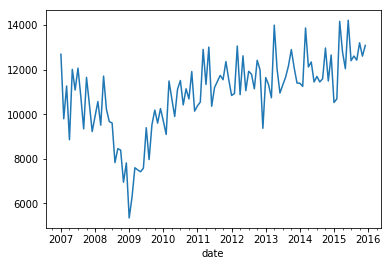

In [73]:
df_train.plot()

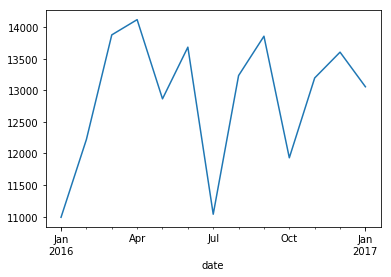

In [74]:
df_test.plot()

In [75]:
df = df.groupby(['date'])['Quantity'].sum()

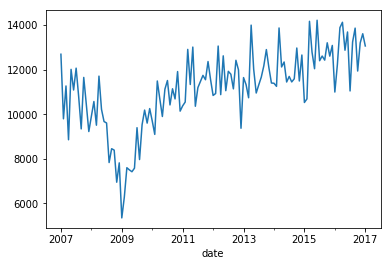

In [76]:
df.plot()

In [77]:
from statsmodels.tsa.arima_model import ARIMA

In [78]:
model = ARIMA(df_train, order=(5,1,0))
model_fit = model.fit(disp=0)

/home/abhishek/anaconda2/lib/python2.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/abhishek/anaconda2/lib/python2.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/abhishek/anaconda2/lib/python2.7/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/home/abhishek/anaconda2/lib/python2.7/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead

In [79]:
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:             D.Quantity   No. Observations:                  107
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -898.157
Method:                       css-mle   S.D. of innovations           1065.307
Date:                Tue, 06 Nov 2018   AIC                           1810.314
Time:                        15:27:20   BIC                           1829.024
Sample:                    02-01-2007   HQIC                          1817.899
                         - 12-01-2015                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               15.7877     34.287      0.460      0.646     -51.414      82.989
ar.L1.D.Quantity    -0.7800      0.097     -8.069      0.000      -0.969      -0.591
ar.L2.D.Quantity    -0.4678 

In [81]:
from pandas import DataFrame

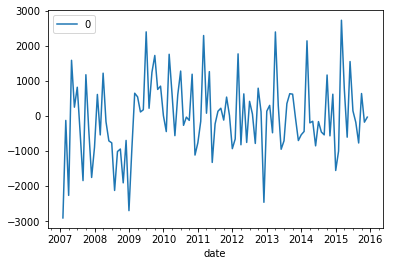

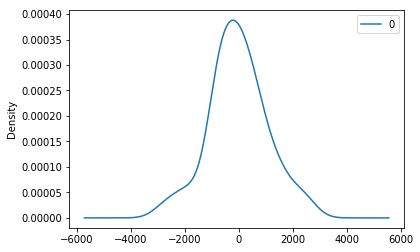

                 0
count   107.000000
mean    -25.520889
std    1087.234821
min   -2906.787691
25%    -701.187586
50%    -113.200302
75%     631.005606
max    2737.548166


In [82]:
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

In [86]:
series = df


predicted=11249.661926, expected=11660.000000
predicted=11300.365918, expected=12167.000000
predicted=12112.709540, expected=12893.000000
predicted=12217.505192, expected=12079.000000
predicted=12200.284337, expected=11395.000000
predicted=11900.071025, expected=11385.000000
predicted=11590.372595, expected=11246.000000
predicted=11585.797288, expected=13861.000000
predicted=12323.487590, expected=12115.000000
predicted=12592.048300, expected=12337.000000
predicted=12249.376504, expected=11441.000000
predicted=11840.983503, expected=11690.000000
predicted=11833.348345, expected=11444.000000
predicted=12091.332755, expected=11585.000000
predicted=11731.599466, expected=12963.000000
predicted=12060.756833, expected=11486.000000
predicted=12055.417754, expected=12649.000000
predicted=12002.682724, expected=10523.000000
predicted=11711.436356, expected=10685.000000
predicted=11260.731471, expected=14159.000000
predicted=11943.610715, expected=12782.000000
predicted=12752.866465, expected=1

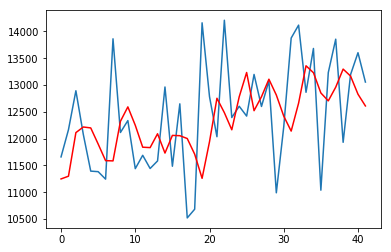

In [87]:
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

/home/abhishek/anaconda2/lib/python2.7/site-packages/matplotlib/figure.py:459: UserWarning:

matplotlib is currently using a non-GUI backend, so cannot show the figure



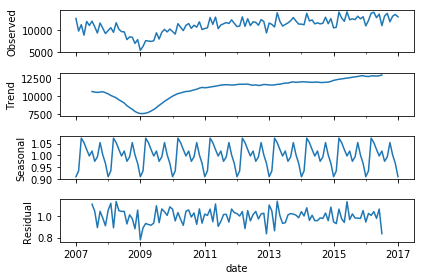

In [94]:
from plotly.plotly import plot_mpl
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df, model='multiplicative')
fig = result.plot()
fig.show()

In [105]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [107]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df_train,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:2297.76604066
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1989.66197218
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1698.10898591
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1461.43418302
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1719.07992039
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1676.40970613
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1492.40944663
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1460.44616435
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:2206.01230557
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1942.2679641
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1668.13384811
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1424.59389337
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1710.2900286
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1644.46371768
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1476.58030958
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1426.10099366
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1831.45319957
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1618.30092659
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:1673.80169018
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - 

In [108]:
mod = sm.tsa.statespace.SARIMAX(df_train,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3329      0.154     -2.164      0.030      -0.634      -0.031
ma.L1         -0.4444      0.122     -3.652      0.000      -0.683      -0.206
ar.S.L12       0.0488      0.159      0.306      0.760      -0.264       0.361
ma.S.L12      -0.7733      0.164     -4.701      0.000      -1.096      -0.451
sigma2      9.606e+05    1.9e+05      5.048      0.000    5.88e+05    1.33e+06


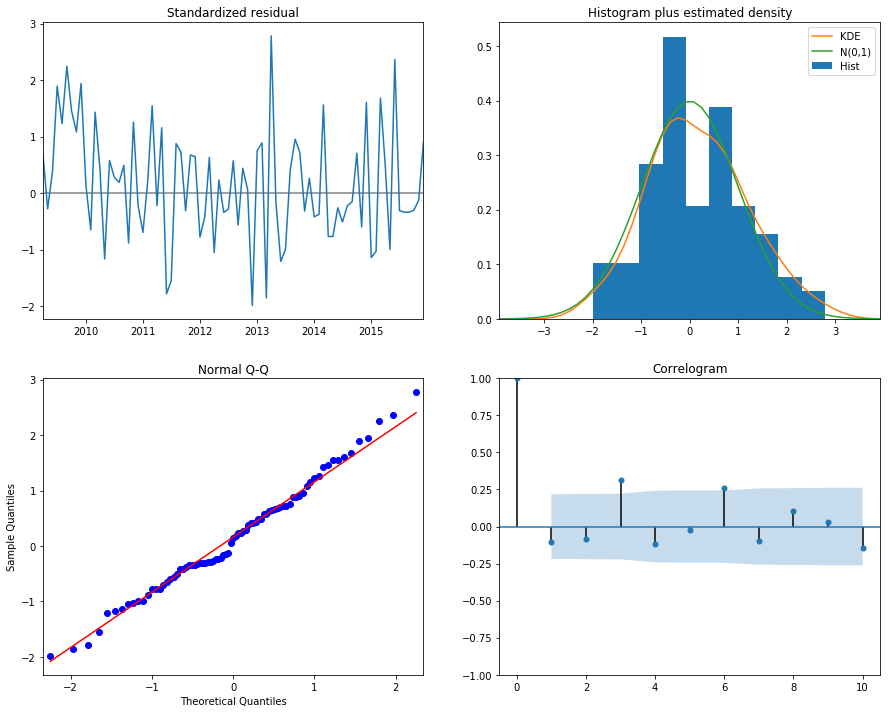

In [109]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [115]:
pred = results.get_prediction(start=pd.to_datetime('2016-01-01'))
pred_ci = pred.conf_int()

In [138]:
y_forecasted = pred.predicted_mean
y_truth = df_test['2016-01-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The root of Mean Squared Error of our forecasts is :',math.sqrt(mse))


The Mean Squared Error of our forecasts is 1259104.24
('The root of Mean Squared Error of our forecasts is :', 1122.0981435112135)


In [139]:
pred_uc = results.get_forecast(steps=50)
pred_ci = pred_uc.conf_int()

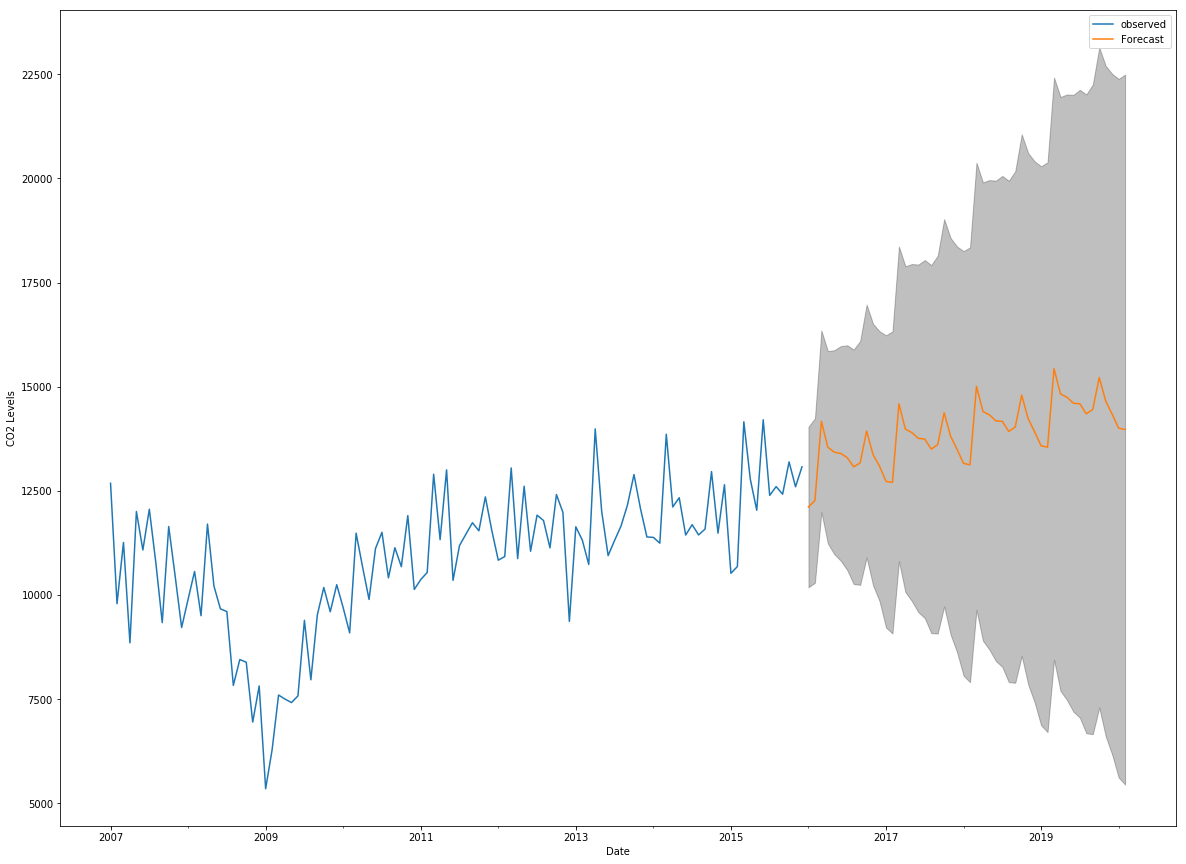

In [140]:
ax = df_train.plot(label='observed', figsize=(20, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')

plt.legend()
plt.show()